# Simulation results from experiments identifying sources of deviation
- This notebook contains simulation results from experiments designed to identify sources of deviation.
- This notbook is executed with Qiskit 0.23.

# Import

In [1]:
import numpy as np
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *
from qiskit import IBMQ
IBMQ.load_account()
from qiskit import Aer, BasicAer, execute, transpile, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.tools.jupyter import *
import os, time

# 1. Verify the affection of number of qubits on the deviation
## 1.1. Two-qubit circuit
### a) Circuit

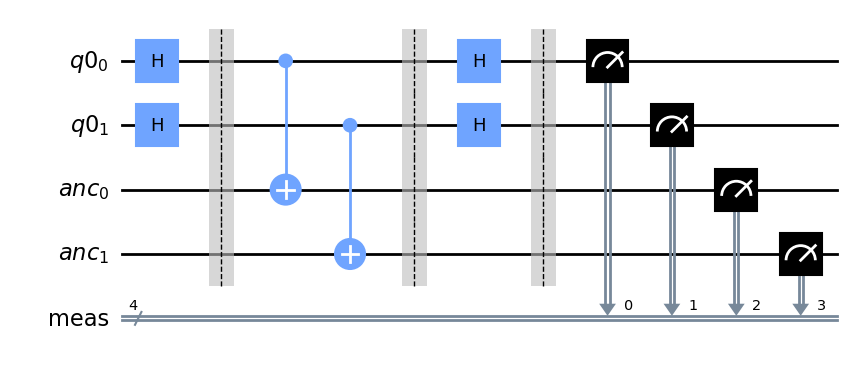

In [3]:
n_test = 2
n_anc = 2

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.h(0)
qct.h(1)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])

qct.barrier()

qct.h(0)
qct.h(1)

qct.measure_all()
qct.draw(output='mpl')

### b) Raw data

In [4]:
backend = Aer.get_backend('qasm_simulator')
num_shots = 2048*200

job1 = execute(qct, backend=backend, shots=num_shots)
result1 = job1.result()
count1 = result1.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(count1.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del count1[k]
                break
            j+=1

    for k, v in list(count1.items()):
        count1[k[1:]] = count1.pop(k)

### c) Final result (Converted to probability)

In [6]:
df1 = pd.DataFrame(list(count1.items()), columns=["States", "Counts"])
df1.to_excel("testsim_2q_Hadamard_data.xlsx", index=False)
simulation = pd.read_excel("testsim_2q_Hadamard_data.xlsx", dtype={"States": str})
count1 = dict(zip(simulation["States"], simulation["Counts"]))

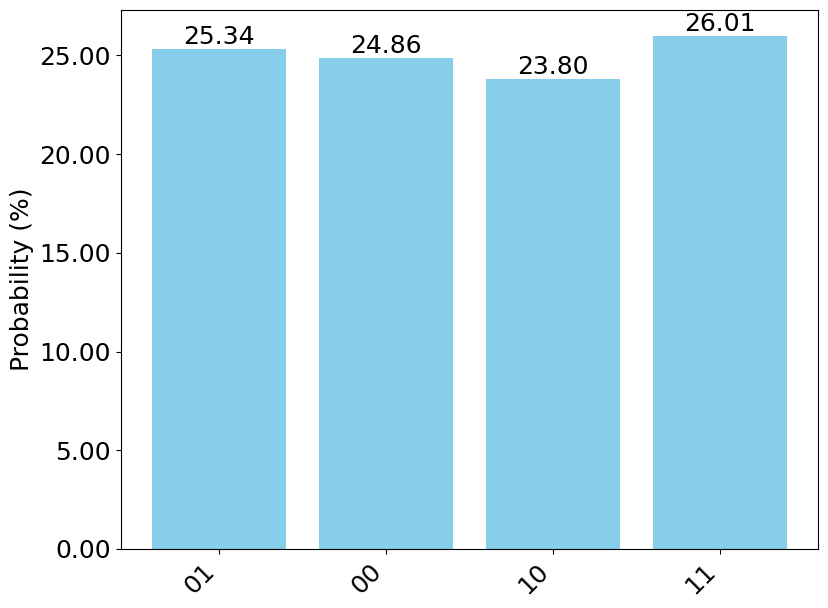

In [7]:
from matplotlib.ticker import FuncFormatter
total_count = sum(count1.values())

probabilities = {state: count / total_count for state, count in count1.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

plt.figure(figsize=(9, 7))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=18)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=18)

plt.show()

## 1.2. Three-qubit circuit
### a) Circuit

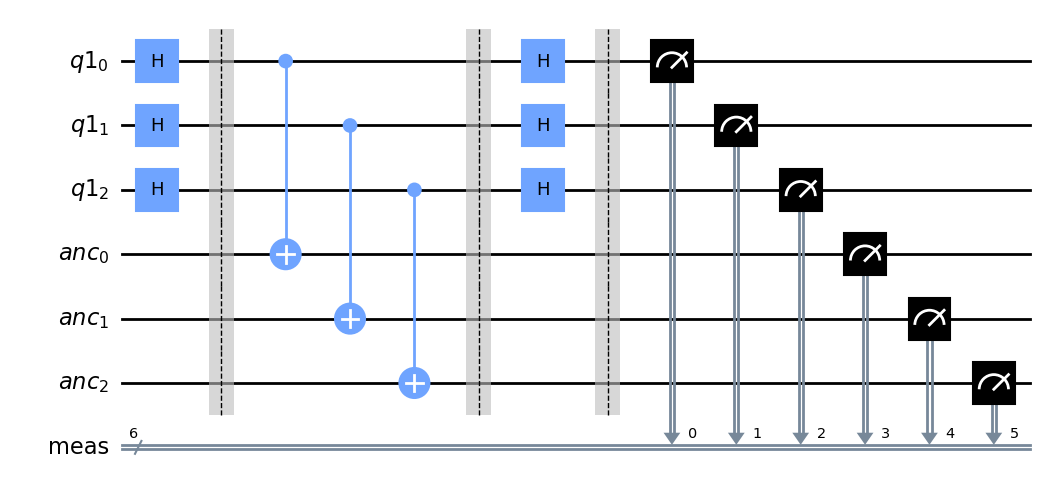

In [8]:
n_test = 3
n_anc = 3

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.h(0)
qct.h(1)
qct.h(2)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])
qct.cx(2,anc[2])


qct.barrier()

qct.h(0)
qct.h(1)
qct.h(2)

qct.measure_all()
qct.draw(output='mpl')

### b) Raw data

In [9]:
job2 = execute(qct, backend=backend, shots=num_shots)
result2 = job2.result()
count2 = result2.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(count2.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del count2[k]
                break
            j+=1

    for k, v in list(count2.items()):
        count2[k[1:]] = count2.pop(k)

### c) Final result

In [10]:
df2 = pd.DataFrame(list(count2.items()), columns=["States", "Counts"])
df2.to_excel("testsim_3q_Hadamard_data.xlsx", index=False)
simulation = pd.read_excel("testsim_3q_Hadamard_data.xlsx", dtype={"States": str})
count2 = dict(zip(simulation["States"], simulation["Counts"]))

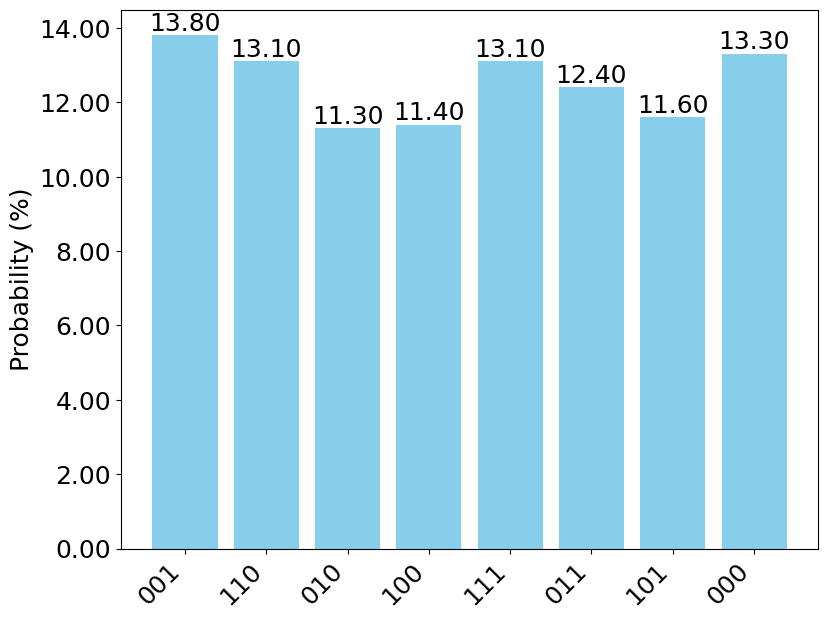

In [11]:
total_count = sum(count2.values())

probabilities = {state: count / total_count for state, count in count2.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

plt.figure(figsize=(9, 7))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=18)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=18)

plt.show()

# 2. Verify the impact of the $\theta$ value on the deviation
## 2.1. $\theta = 0.2\pi$ (rad)
### a) Circuit

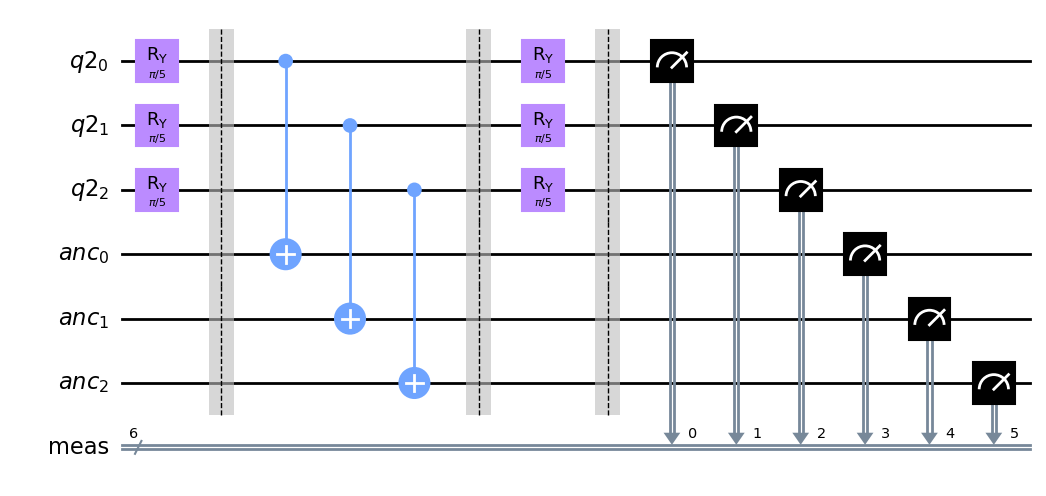

In [12]:
n_test = 3
n_anc = 3
pi = np.pi
theta = 0.2*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])
qct.cx(2,anc[2])


qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### b) Raw data

In [13]:
job3 = execute(qct, backend=backend, shots=num_shots)
result3 = job3.result()
count3 = result3.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(count3.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del count3[k]
                break
            j+=1

    for k, v in list(count3.items()):
        count3[k[1:]] = count3.pop(k)

### c) Final result

In [14]:
df3 = pd.DataFrame(list(count3.items()), columns=["States", "Counts"])
df3.to_excel("testsim_3q_Ry_smaller_theta_data.xlsx", index=False)
simulation = pd.read_excel("testsim_3q_Ry_smaller_theta_data.xlsx", dtype={"States": str})
count3 = dict(zip(simulation["States"], simulation["Counts"]))

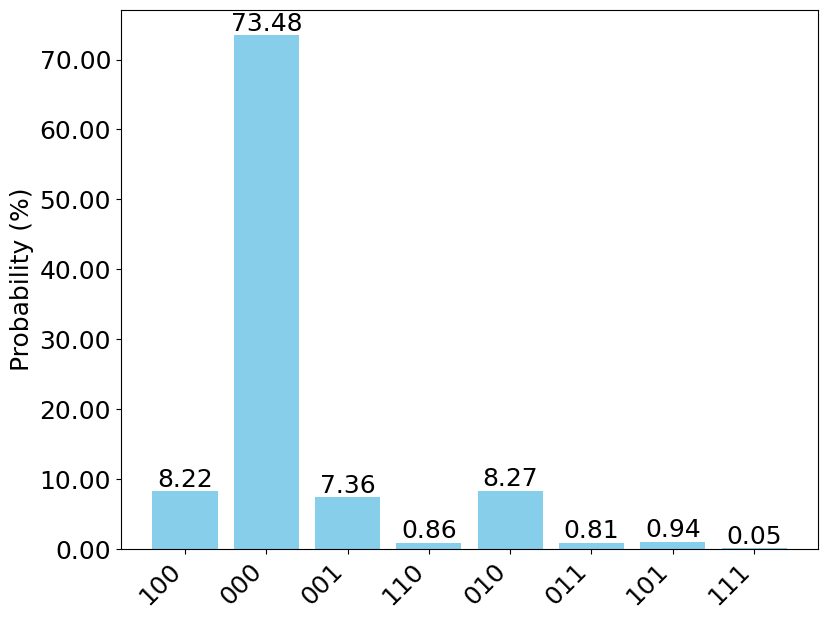

In [15]:
total_count = sum(count3.values())

probabilities = {state: count / total_count for state, count in count3.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

plt.figure(figsize=(9, 7))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=18)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=18)

plt.show()

## 2.2. $\theta = 0.45\pi$ (rad)
### a) Circuit

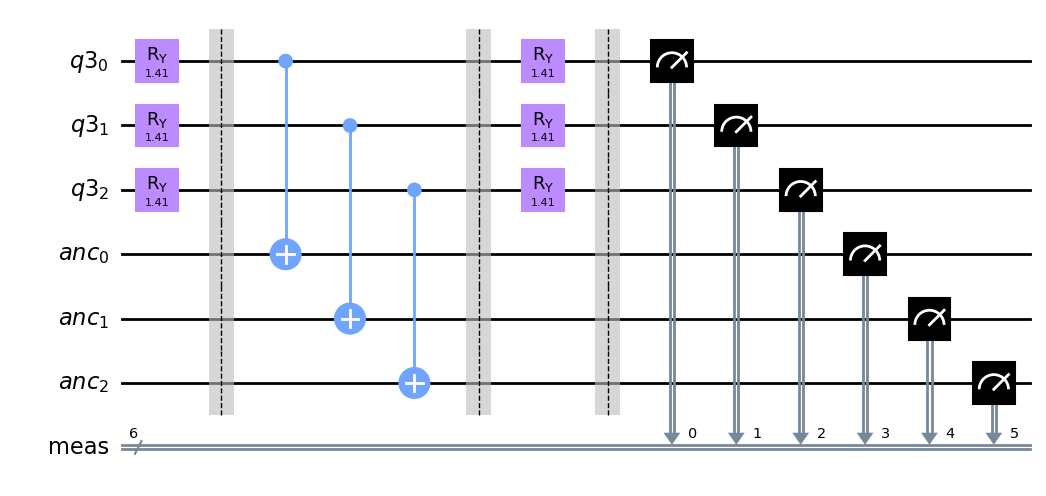

In [16]:
n_test = 3
n_anc = 3
pi = np.pi
theta = 0.45*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])
qct.cx(2,anc[2])


qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### b) Raw data

In [17]:
job4 = execute(qct, backend=backend, shots=num_shots)
result4 = job4.result()
count4 = result4.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(count4.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del count4[k]
                break
            j+=1

    for k, v in list(count4.items()):
        count4[k[1:]] = count4.pop(k)

### c) Final result

In [18]:
df4 = pd.DataFrame(list(count4.items()), columns=["States", "Counts"])
df4.to_excel("testsim_3q_Ry_data.xlsx", index=False)
simulation = pd.read_excel("testsim_3q_Ry_data.xlsx", dtype={"States": str})
count4 = dict(zip(simulation["States"], simulation["Counts"]))

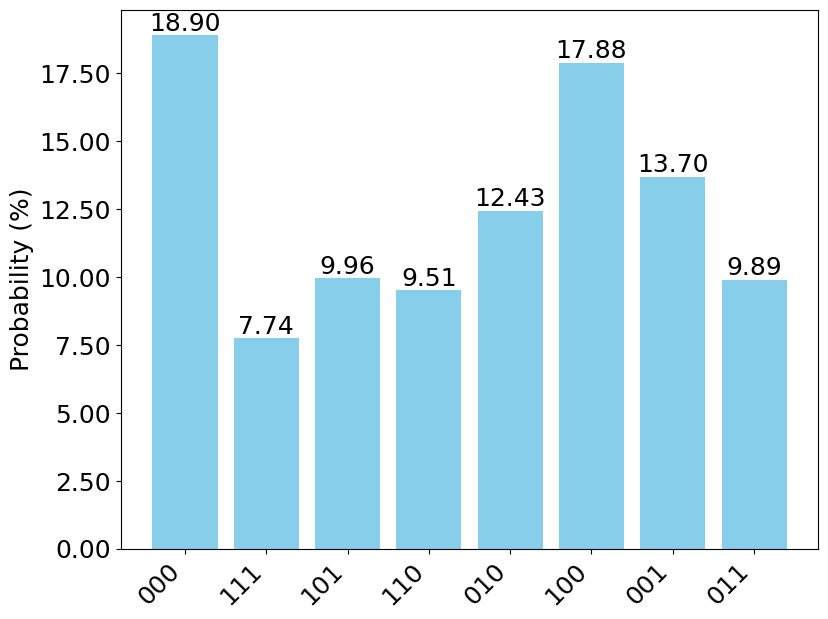

In [19]:
total_count = sum(count4.values())

probabilities = {state: count / total_count for state, count in count4.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

plt.figure(figsize=(9, 7))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=18)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=18)

plt.show()

# 3. Verify the impact of the number of control qubits and the shared control qubits between Toffoli gate on the deviations
## 3.1. Three control qubits - one target qubit
### a) Circuit

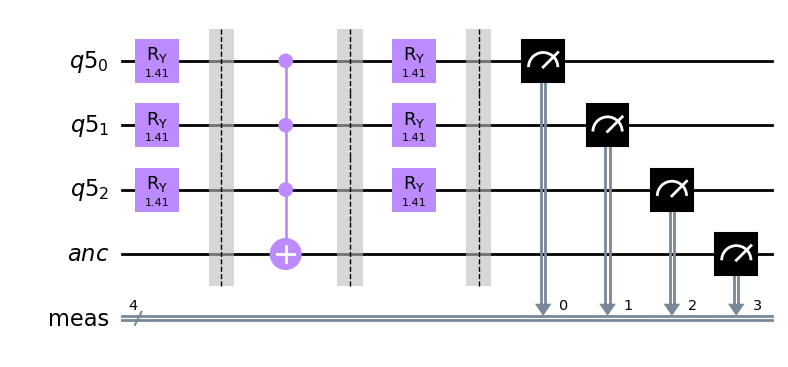

In [21]:
n_test = 3
n_anc = 1
pi = np.pi
theta = 0.45*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.mcx([0,1,2],anc)

qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### b) Raw data

In [22]:
job5 = execute(qct, backend=backend, shots=num_shots)
result5 = job5.result()
count5 = result5.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(count5.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del count5[k]
                break
            j+=1

    for k, v in list(count5.items()):
        count5[k[1:]] = count5.pop(k)

### c) Final result

In [23]:
df5 = pd.DataFrame(list(count5.items()), columns=["States", "Counts"])
df5.to_excel("testsim_3q_3control_1target_Ry_data.xlsx", index=False)
simulation = pd.read_excel("testsim_3q_3control_1target_Ry_data.xlsx", dtype={"States": str})
count5 = dict(zip(simulation["States"], simulation["Counts"]))

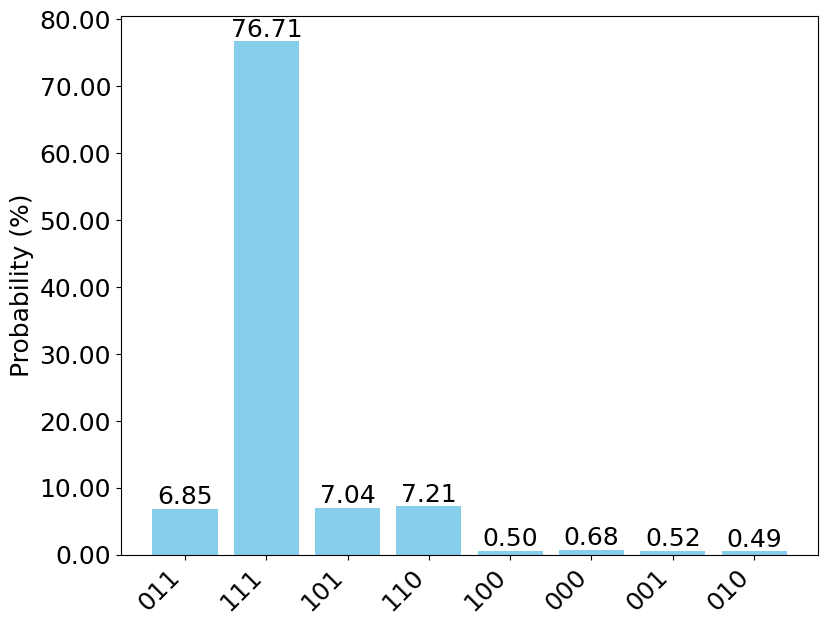

In [24]:
total_count = sum(count5.values())

probabilities = {state: count / total_count for state, count in count5.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

plt.figure(figsize=(9, 7))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=18)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=18)

plt.show()

## 3.2. Three pairs of control qubits - Three targets - Shared control qubits exist
### a) Circuit

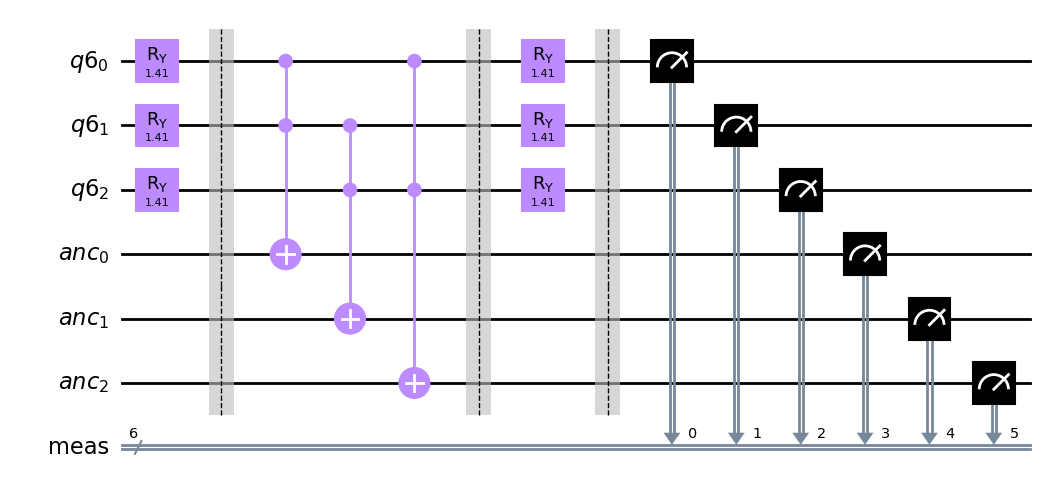

In [25]:
n_test = 3
n_anc = 3
pi = np.pi
theta = 0.45*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.ccx(0,1,anc[0])
qct.ccx(1,2,anc[1])
qct.ccx(0,2,anc[2])

qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### b) Raw data

In [26]:
job6 = execute(qct, backend=backend, shots=num_shots)
result6 = job6.result()
count6 = result6.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(count6.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del count6[k]
                break
            j+=1

    for k, v in list(count6.items()):
        count6[k[1:]] = count6.pop(k)

### c) Final result

In [27]:
df6 = pd.DataFrame(list(count6.items()), columns=["States", "Counts"])
df6.to_excel("testsim_3q_3control_3target_Ry_data.xlsx", index=False)
simulation = pd.read_excel("testsim_3q_3control_3target_Ry_data.xlsx", dtype={"States": str})
count6 = dict(zip(simulation["States"], simulation["Counts"]))

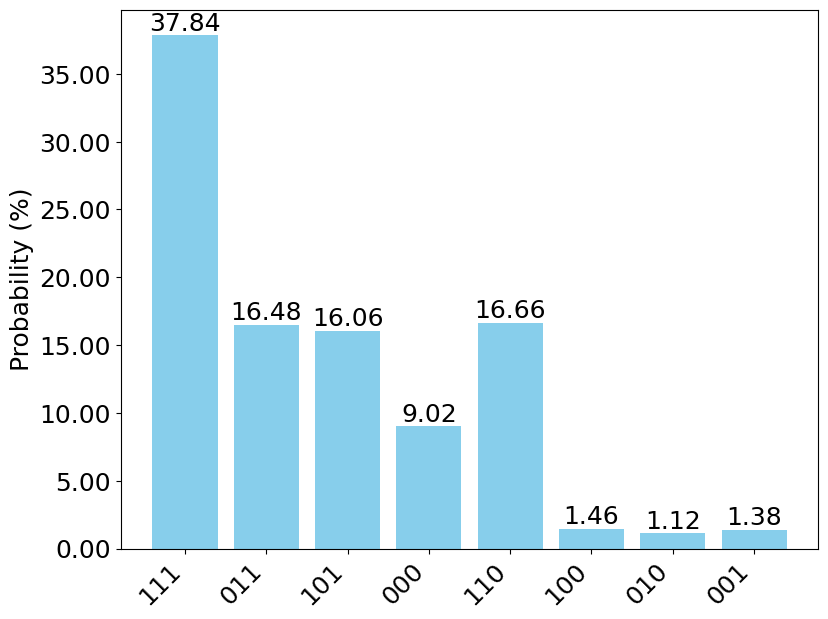

In [28]:
total_count = sum(count6.values())

probabilities = {state: count / total_count for state, count in count6.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

plt.figure(figsize=(9, 7))
bars = plt.bar(states, prob_values, color='skyblue')

for bar, prob in zip(bars, prob_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{prob * 100:.2f}', ha='center', va='bottom', fontsize=18)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=18)

plt.show()